In [42]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Creating Embeddings of items in FasionMNIST with an autoencoder
![](https://www.compthree.com/images/blog/ae/ae.png)

In [64]:
import torch
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader, random_split
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from model import AutoEncoder

In [10]:
# reproducibility
torch.manual_seed(5);

#### Config

In [35]:
BATCH_SIZE = 64
DEVICE = (torch.device("cuda") if torch.cuda.is_available() 
          else (torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")))

#### Load FashionMNIST

In [7]:
train_set = FashionMNIST(
    root="./data",
    train=True,
    download=False,
    transform=ToTensor()
)

test_set = FashionMNIST(
    root="./data",
    train=False,
    download=False,
    transform=ToTensor()
)

#### Split train into train and validation
80/20 split

In [12]:
split = [0.8, 0.2]
train_set, val_set = random_split(train_set, split)

In [24]:
len(train_set), len(val_set), len(test_set)

(48000, 12000, 10000)

#### Visualize Data

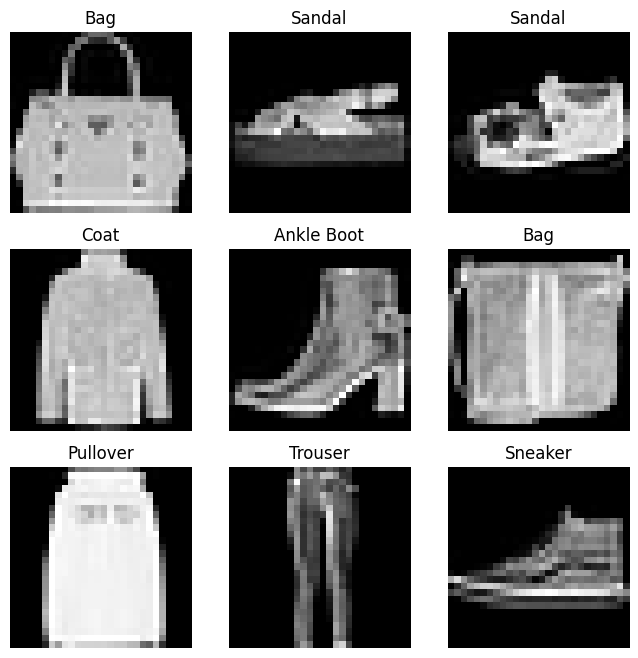

In [19]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_set), size=(1,)).item()
    img, label = train_set[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

#### Create dataloaders

In [25]:
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_set, batch_size=BATCH_SIZE, shuffle=True)

#### Create autoencoder

In [67]:
autoencoder = AutoEncoder(encoder_params=[10, 9, 8], decoder_params=[8, 9, 10])